In [1]:
import seaborn as sns
sns.set(style='white')
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
import folium
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
incidentes_viales_cdmx = pd.read_csv('../Datasets/Accidentes/incidentes-viales-2020.csv', encoding= 'Latin-1', low_memory=False)
incidentes_viales_cdmx.tail()

,folio,fecha_creacion,año_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,incidente_c4,delegacion_inicio,latitud,longitud,ano_cierre,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes_cierre,numero_incidente,V_F
119695,C5/201231/08132,31/12/2020,2020,23:48:48,Jueves,01/01/2021,00:06:12,accidente choque con lesionados,TLALPAN,19.302180,-99.147020,2021,URGENCIAS MEDICAS,LLAMADA DEL 911,TLALPAN,Enero,1,V
119696,AO/201231/07706,31/12/2020,2020,22:50:08,Jueves,01/01/2021,02:45:33,accidente choque con lesionados,MIGUEL HIDALGO,19.412716,-99.189823,2021,URGENCIAS MEDICAS,BOTON DE AUXILIO,MIGUEL HIDALGO,Enero,1,V
119697,C5/201231/08137,31/12/2020,2020,23:49:56,Jueves,01/01/2021,00:06:37,accidente choque con lesionados,TLALPAN,19.296480,-99.146270,2021,URGENCIAS MEDICAS,LLAMADA DEL 911,TLALPAN,Enero,1,V
119698,C5/201231/08161,31/12/2020,2020,23:53:33,Jueves,01/01/2021,01:45:26,accidente choque con lesionados,IZTAPALAPA,19.352450,-99.014730,2021,URGENCIAS MEDICAS,RADIO,IZTAPALAPA,Enero,1,V
119699,C5/201231/08188,31/12/2020,2020,23:54:59,Jueves,01/01/2021,00:41:00,accidente choque sin lesionados,ALVARO OBREGON,19.381050,-99.239490,2021,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,Enero,1,V


In [3]:
column_name_mapping = {
    'incidente_c4' : 'tipo_de_incidente',
    'clas_con_f_alarma': 'clasificacion_incidente',
    'tipo_entrada': 'medio_de_aviso',
    'ano_cierre' : 'año_cierre'
}

incidentes_viales_cdmx = incidentes_viales_cdmx.rename(columns = column_name_mapping)

incidentes_viales_cdmx.head(3)

,folio,fecha_creacion,año_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_de_incidente,delegacion_inicio,latitud,longitud,año_cierre,clasificacion_incidente,medio_de_aviso,delegacion_cierre,mes_cierre,numero_incidente,V_F
0,GA/200101/07486,01/01/2020,2020,17:43:33,Miercoles,01/01/2020,18:39:13,accidente choque con lesionados,GUSTAVO A. MADERO,19.47141,-99.12234,2020,URGENCIAS MEDICAS,RADIO,GUSTAVO A. MADERO,Enero,1,V
1,C5/200101/05741,01/01/2020,2020,13:31:29,Miercoles,01/01/2020,14:02:13,accidente choque con lesionados,COYOACAN,19.33673,-99.19002,2020,URGENCIAS MEDICAS,LLAMADA DEL 911,COYOACAN,Enero,1,V
2,C5/200101/07368,01/01/2020,2020,17:22:01,Miercoles,01/01/2020,17:57:05,accidente choque sin lesionados,TLAHUAC,19.31391,-99.04225,2020,EMERGENCIA,LLAMADA DEL 911,TLAHUAC,Enero,1,V


# nltk_text

In [4]:
incidentes_viales_cdmx.columns

Index(['folio', 'fecha_creacion', 'año_creacion', 'hora_creacion',
       'dia_semana', 'fecha_cierre', 'hora_cierre', 'tipo_de_incidente',
       'delegacion_inicio', 'latitud', 'longitud', 'año_cierre',
       'clasificacion_incidente', 'medio_de_aviso', 'delegacion_cierre',
       'mes_cierre', 'numero_incidente', 'V_F'],
      dtype='object')

In [5]:
grouped_by_incidente = incidentes_viales_cdmx.groupby('folio')['tipo_de_incidente'].max()
grouped_by_incidente

folio
AO/200101/00533             accidente motociclista
AO/200101/01998    accidente choque con lesionados
AO/200101/02017    accidente choque con lesionados
AO/200101/03414    accidente choque con lesionados
AO/200101/03839    accidente choque con lesionados
                                ...               
IZ/201222/02275              lesionado atropellado
IZ/201222/04745              lesionado atropellado
IZ/201222/05270    accidente choque sin lesionados
IZ/201222/05939    accidente choque sin lesionados
IZ/201222/06063    accidente choque sin lesionados
Name: tipo_de_incidente, Length: 119700, dtype: object

In [6]:
grouped_by_incidente = grouped_by_incidente.str.lower()
grouped_by_incidente = grouped_by_incidente.str.strip()
grouped_by_incidente = grouped_by_incidente.str.replace('[^\w\s]', '')
grouped_by_incidente = grouped_by_incidente.str.replace('\d', '')
grouped_by_incidente = grouped_by_incidente.str.replace('\\n', '')
grouped_by_incidente = grouped_by_incidente.dropna()

grouped_by_incidente

<ipython-input-6-03da5c324e31>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_incidente = grouped_by_incidente.str.replace('[^\w\s]', '')
<ipython-input-6-03da5c324e31>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_incidente = grouped_by_incidente.str.replace('\d', '')
<ipython-input-6-03da5c324e31>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_incidente = grouped_by_incidente.str.replace('\\n', '')


folio
AO/200101/00533             accidente motociclista
AO/200101/01998    accidente choque con lesionados
AO/200101/02017    accidente choque con lesionados
AO/200101/03414    accidente choque con lesionados
AO/200101/03839    accidente choque con lesionados
                                ...               
IZ/201222/02275              lesionado atropellado
IZ/201222/04745              lesionado atropellado
IZ/201222/05270    accidente choque sin lesionados
IZ/201222/05939    accidente choque sin lesionados
IZ/201222/06063    accidente choque sin lesionados
Name: tipo_de_incidente, Length: 119700, dtype: object

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Casa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
tokenized = grouped_by_incidente.apply(nltk.word_tokenize)
tokenized

folio
AO/200101/00533               [accidente, motociclista]
AO/200101/01998    [accidente, choque, con, lesionados]
AO/200101/02017    [accidente, choque, con, lesionados]
AO/200101/03414    [accidente, choque, con, lesionados]
AO/200101/03839    [accidente, choque, con, lesionados]
                                   ...                 
IZ/201222/02275                [lesionado, atropellado]
IZ/201222/04745                [lesionado, atropellado]
IZ/201222/05270    [accidente, choque, sin, lesionados]
IZ/201222/05939    [accidente, choque, sin, lesionados]
IZ/201222/06063    [accidente, choque, sin, lesionados]
Name: tipo_de_incidente, Length: 119700, dtype: object

In [9]:
all_words = tokenized.sum()
text = nltk.Text(all_words)

In [10]:
text.concordance('lesionado', lines=20)

Displaying 20 of 13325 matches:
os accidente choque sin lesionados lesionado atropellado accidente choque con l
os accidente choque sin lesionados lesionado atropellado accidente motociclista
os accidente choque sin lesionados lesionado atropellado accidente choque sin l
ta accidente choque sin lesionados lesionado atropellado lesionado atropellado 
n lesionados lesionado atropellado lesionado atropellado accidente choque con l
os accidente choque sin lesionados lesionado atropellado lesionado atropellado 
n lesionados lesionado atropellado lesionado atropellado accidente motociclista
os accidente choque sin lesionados lesionado atropellado lesionado atropellado 
n lesionados lesionado atropellado lesionado atropellado accidente choque sin l
os accidente choque con lesionados lesionado atropellado accidente motociclista
os accidente choque con lesionados lesionado atropellado accidente vehiculo atr
os accidente choque con lesionados lesionado atropellado accidente choque sin l
do accid

In [11]:
text.concordance('sismo', lines=20)

Displaying 20 of 117 matches:
ados accidente choque sin lesionados sismo choque con lesionados accidente choq
ados accidente choque sin lesionados sismo choque con lesionados lesionado atro
ados accidente choque sin lesionados sismo choque con lesionados accidente choq
sin lesionados lesionado atropellado sismo choque con lesionados accidente choq
ados accidente choque sin lesionados sismo choque con lesionados lesionado atro
lado accidente choque con lesionados sismo choque con lesionados accidente moto
ados accidente choque sin lesionados sismo choque con lesionados accidente choq
ista accidente choque con lesionados sismo choque con lesionados accidente choq
ados accidente choque sin lesionados sismo choque con lesionados lesionado atro
lado accidente choque sin lesionados sismo choque con lesionados accidente choq
lado accidente choque con lesionados sismo choque con lesionados lesionado atro
ados accidente choque sin lesionados sismo choque con lesionados lesionado atro
ados accid

In [12]:
text.collocations()

accidente choque; lesionados accidente; sin lesionados; choque sin;
lesionado atropellado; choque con; con lesionados; accidente
motociclista; motociclista accidente; atropellado accidente;
atropellado lesionado; lesionados lesionado; accidente volcadura;
atrapada desbarrancada; persona atrapada; atrapado varado; vehiculo
atrapado; volcadura accidente; accidente ciclista; ciclista accidente


In [13]:
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(50)

[('accidente', 105970),
 ('choque', 88669),
 ('lesionados', 88385),
 ('sin', 56236),
 ('con', 32433),
 ('atropellado', 13519),
 ('lesionado', 13325),
 ('motociclista', 11324),
 ('volcadura', 3074),
 ('ciclista', 1651),
 ('vehiculo', 570),
 ('persona', 548),
 ('atrapada', 540),
 ('desbarrancada', 540),
 ('atrapado', 494),
 ('varado', 494),
 ('prensados', 284),
 ('cadaver', 249),
 ('automovilistico', 169),
 ('sismo', 117),
 ('detencion', 114),
 ('ciudadana', 114),
 ('mi', 94),
 ('ciudad', 94),
 ('incidente', 94),
 ('de', 94),
 ('transito', 94),
 ('calle', 93),
 ('desbarrancado', 76),
 ('otros', 63),
 ('ferroviario', 10),
 ('monopatin', 9),
 ('atropellada', 8),
 ('taxi', 1)]

In [14]:
spanish_stop_words = stopwords.words('spanish')

all_words_except_stop_words = [word for word in all_words if word not in spanish_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)
freq_dist_no_stop_words.most_common(50)

[('accidente', 105970),
 ('choque', 88669),
 ('lesionados', 88385),
 ('atropellado', 13519),
 ('lesionado', 13325),
 ('motociclista', 11324),
 ('volcadura', 3074),
 ('ciclista', 1651),
 ('vehiculo', 570),
 ('persona', 548),
 ('atrapada', 540),
 ('desbarrancada', 540),
 ('atrapado', 494),
 ('varado', 494),
 ('prensados', 284),
 ('cadaver', 249),
 ('automovilistico', 169),
 ('sismo', 117),
 ('detencion', 114),
 ('ciudadana', 114),
 ('ciudad', 94),
 ('incidente', 94),
 ('transito', 94),
 ('calle', 93),
 ('desbarrancado', 76),
 ('ferroviario', 10),
 ('monopatin', 9),
 ('atropellada', 8),
 ('taxi', 1)]

In [15]:
print(f'{(100 * freq_dist_no_stop_words["cadaver"] / len(all_words_except_stop_words)):.3f}%')

0.075%


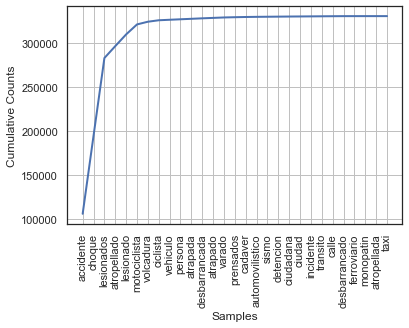

In [16]:
freq_dist_no_stop_words.plot(50, cumulative=True);

In [17]:
freq_dist_no_stop_words.hapaxes()[:20]

['taxi']

C:\Users\Casa\anaconda3\envs\BEDU\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Neither the `x` nor `y` variable appears to be numeric.

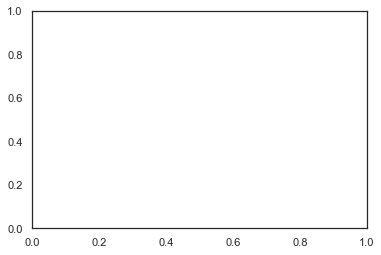

In [18]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

C:\Users\Casa\anaconda3\envs\BEDU\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


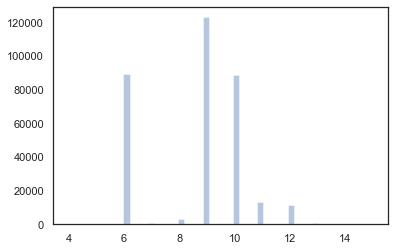

In [19]:
word_lengths = [len(w) for w in all_words_except_stop_words]
sns.distplot(word_lengths, kde=False, norm_hist=False);

In [20]:
sentence_lengths = grouped_by_title.apply(lambda x: len(x))
sns.distplot(sentence_lengths, kde=False, norm_hist=False);

NameError: name 'grouped_by_title' is not defined

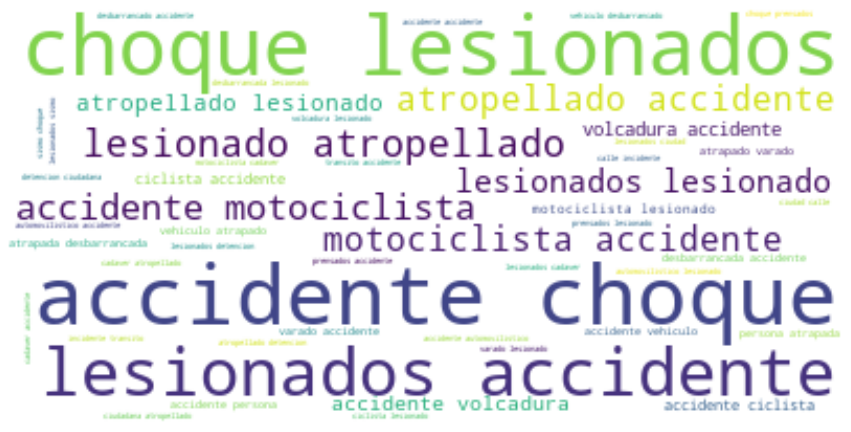

In [21]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()